<a href="https://colab.research.google.com/github/patelhiren3385/Data_Visualization/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Pandas

In [ ]:
df = sns.load_dataset('planets')

In [ ]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
df.describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


# Drop NAN value from dataframe:
1. Going through each item - $N^2$ time complex
2. Using df.iterrows() - return - Index,(Index,:)
3. Using df.dropna()

In [ ]:
for i in df.index:
  for j in df.columns:
    if pd.isnull(df.loc[i,j]):
      df.drop(i,inplace=True)
      break

In [ ]:
for i, r in df.iterrows():
  if pd.isnull(r).any():
    df.drop(i,inplace=True)

In [ ]:
df.dropna(inplace=True)

# Data Query

Give me planets which are found using Radial Velocity and Transit method in year not below 2010 and having distance more than 75 percentile.


In [ ]:
per_75 = df.distance.quantile(0.75)
for i, r  in df.iterrows():
  if r['year'] < 2010:
    df.drop(i,inplace=True)
    continue
  if r['method'] != 'Radial Velocity' and r['method'] != 'Transit':
    df.drop(i,inplace=True)
    continue
  if r['distance'] < per_75:
    df.drop(i, inplace = True)
    continue

In [ ]:
prt_75 = df.distance.quantile(0.75)
df_=  df[
    (df['year'] >= 2010) & # Retain Values meeting condition
    ((df['method'] == 'Radial Velocity') | (df['method']=='Transit')) &
    (df['distance'] >= per_75)
]

# Modify Column Name

In [ ]:
s = 'Radial Velocity'
po = ''.join([x[0] for x in s.split(' ')])

In [ ]:
short_name = {}
for s in df.method.unique():
  short_name[s] = ''.join([x[0] for x in s.split(' ')])

In [ ]:
short_name

{'Astrometry': 'A',
 'Eclipse Timing Variations': 'ETV',
 'Imaging': 'I',
 'Microlensing': 'M',
 'Orbital Brightness Modulation': 'OBM',
 'Pulsar Timing': 'PT',
 'Pulsation Timing Variations': 'PTV',
 'Radial Velocity': 'RV',
 'Transit': 'T',
 'Transit Timing Variations': 'TTV'}

In [ ]:
for i, r  in df.iterrows():
  df[i, 'Short_method'] = short_name.get(r['method'],r['method'])

In [ ]:
def shorten_method(s):
  return short_name.get(s,s)

In [ ]:
df['short_name'] = df['method'].apply(shorten_method)

In [ ]:
df

,method,number,orbital_period,mass,distance,year,short_name
0,Radial Velocity,1,269.300000,7.10,77.40,2006,RV
1,Radial Velocity,1,874.774000,2.21,56.95,2008,RV
2,Radial Velocity,1,763.000000,2.60,19.84,2011,RV
3,Radial Velocity,1,326.030000,19.40,110.62,2007,RV
4,Radial Velocity,1,516.220000,10.50,119.47,2009,RV
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,T
1031,Transit,1,2.615864,NaN,148.00,2007,T
1032,Transit,1,3.191524,NaN,174.00,2007,T
1033,Transit,1,4.125083,NaN,293.00,2008,T


# Use of GroupBy Method

1. Split dataframe in to smaller data according to method name
2. Apply some function in each smaller chunks
3. Aggregregate the result from each chunk together

In [ ]:
data = sns.load_dataset('planets')

In [ ]:
data.head()

In [ ]:
data.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [ ]:
d = {}
for m in data.method.unique():
  d[m] = data[data.method == m]['method'].count()

In [ ]:
# Groupby (method ) will group the data by that and we can operate now on any 
# column and can use any function to get insight of data
data.groupby('method')['distance'].mean()

Find what fraction fraction of planets have been found out by particular method in last decade

In [ ]:
df_ = data[
           (data['year'] >= 2010)
]

In [ ]:

df_.groupby('method')['method'].count()/data.groupby('method')['method'].count()

# NIFTY 50 dataset

In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/My\ Drive/PadhAI_datascience

/content/drive/My Drive/PadhAI_datascience


In [ ]:
ls

nifty100.csv


In [ ]:
data_2020 = pd.read_csv('nifty100_2020.csv',index_col=0)
data_2019 = pd.read_csv('nifty100_2019.csv',index_col=0)

In [ ]:
combined = pd.concat([data_2019,data_2020])

In [ ]:
combined

# Hierarchical indexing

In [ ]:
same_time_data = pd.concat([data_2020,data_2020],axis = 1 , keys = ['Data 1','Data 2'])

In [ ]:
same_time_data.head()

In [ ]:
same_time_data['Data 1']['Open'].loc['01-Jan-2020']

In [ ]:
data_ = [['A',10],['B',25],['C',26]]
dap = pd.DataFrame(data_,  columns=['Name','Age'])
grp = dap.groupby('Age')

# Data Visulization

Tabulation:

In [ ]:
!wget https://api.covid19india.org/states_daily.json

--2020-09-07 16:31:50--  https://api.covid19india.org/states_daily.json
Resolving api.covid19india.org (api.covid19india.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to api.covid19india.org (api.covid19india.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337886 (330K) [application/json]
Saving to: ‘states_daily.json’

states_daily.json   100%[===================>] 329.97K  --.-KB/s    in 0.05s   

2020-09-07 16:31:50 (6.26 MB/s) - ‘states_daily.json’ saved [337886/337886]



In [ ]:
import urllib.request
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'covid_data.json')

('covid_data.json', <http.client.HTTPMessage at 0x7f467cadaa58>)

In [ ]:
import json
with open('covid_data.json') as f:
  data = json.load(f)
data


{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl':

In [ ]:
data = data['states_daily']
covid_data = pd.json_normalize(data)

In [ ]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,41,11941,101,2343,1965,185,879,05-Sep-20,0,1920,28,534,1148,21,1409,2287,489,9102,2111,42,0,10801,59,76,1392,32,68,3443,1306,433,1346,26,Recovered,2579,5859,271,73161,0,5141,535,3248
527,1,71,0,7,9,1,19,05-Sep-20,0,25,0,9,16,4,22,15,15,0,11,0,0,312,1,1,30,0,0,7,69,18,14,0,Deceased,11,64,7,916,0,81,18,58
528,40,10794,71,1537,1797,261,2100,06-Sep-20,0,3256,36,374,1335,397,2277,1266,1316,9319,3082,40,0,23350,88,139,1694,31,50,3810,1946,466,1593,9,Confirmed,2574,5783,603,91707,0,6518,668,3087
529,47,11915,91,1763,1924,149,711,06-Sep-20,0,2188,21,558,1212,197,1471,1854,403,9575,2196,24,0,7826,29,189,1238,19,77,2590,1606,525,1616,24,Recovered,2927,5820,262,69624,0,4779,591,3207


In [ ]:
df = covid_data

df.date = pd.to_datetime(df.date)

In [ ]:
df

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,41,11941,101,2343,1965,185,879,2020-09-05,0,1920,28,534,1148,21,1409,2287,489,9102,2111,42,0,10801,59,76,1392,32,68,3443,1306,433,1346,26,Recovered,2579,5859,271,73161,0,5141,535,3248
527,1,71,0,7,9,1,19,2020-09-05,0,25,0,9,16,4,22,15,15,0,11,0,0,312,1,1,30,0,0,7,69,18,14,0,Deceased,11,64,7,916,0,81,18,58
528,40,10794,71,1537,1797,261,2100,2020-09-06,0,3256,36,374,1335,397,2277,1266,1316,9319,3082,40,0,23350,88,139,1694,31,50,3810,1946,466,1593,9,Confirmed,2574,5783,603,91707,0,6518,668,3087
529,47,11915,91,1763,1924,149,711,2020-09-06,0,2188,21,558,1212,197,1471,1854,403,9575,2196,24,0,7826,29,189,1238,19,77,2590,1606,525,1616,24,Recovered,2927,5820,262,69624,0,4779,591,3207


In [ ]:
df.status.unique()

array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [ ]:
conf_covid_data = df[df.status == 'Confirmed']
conf_covid_data.drop('status',axis = 1 ,inplace=True)
recovered_covid_data = df[df.status == 'Recovered']
recovered_covid_data.drop('status',axis = 1,inplace=True)
dead_covid_data = df[df.status == 'Deceased']

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
conf_covid_data.set_index('date',inplace=True)

In [ ]:
conf_covid_data['tn']
pd.to_numeric(df.tn) #convert to int64

0         1
1         0
2         0
3         0
4         0
       ... 
526    5859
527      64
528    5783
529    5820
530      88
Name: tn, Length: 531, dtype: int64

In [ ]:
conf_covid_data = conf_covid_data.apply(pd.to_numeric)

# Styling Tabulation

In [ ]:
last_10_days = conf_covid_data.tail(10)

In [ ]:
last_10_days.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,0,1450,36,209,1101,106,1096,1075,666,5938,1908,69,0,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,61749,0,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,0,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,0,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,0,4782,592,2993


In [ ]:
def color_negative_green(x):
  color = 'green' if x <= 0 else 'black'
  return 'color: ' + color

In [ ]:
last_10_days.style.applymap(color_negative_green)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,0,1450,36,209,1101,106,1096,1075,666,5938,1908,69,0,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,61749,0,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,0,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,0,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,0,4782,592,2993


In [ ]:
last_10_days.style.highlight_max(color='red')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,0,1450,36,209,1101,106,1096,1075,666,5938,1908,69,0,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,61749,0,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,0,1061,18,139,1067,100,1074,940,428,5851,1242,51,0,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,59696,0,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,0,1544,21,392,1096,53,1148,1056,701,8161,2375,90,0,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,66873,0,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,0,1693,22,497,1197,167,1397,1137,704,8580,2476,31,0,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,75995,0,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,0,1840,42,456,1190,180,1293,1365,655,9386,2406,41,0,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,76827,0,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,0,1808,31,523,1272,136,1298,1137,696,8960,2543,48,0,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,76657,0,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,0,1954,15,547,1282,144,1391,1299,546,8324,2397,63,0,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,78479,0,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,0,2024,32,451,1272,164,1295,1323,786,8852,2154,35,0,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,79461,0,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,0,1358,27,414,1280,171,1450,3221,535,6495,1530,43,0,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,68766,0,4782,592,2993


In [ ]:
last_10_days.drop(['dd','ld','tt','un'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
last_10_days.style.highlight_max(color='red')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,1450,36,209,1101,106,1096,1075,666,5938,1908,69,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [ ]:
last_10_days.style.highlight_max(color='red',axis =1).highlight_min(color = 'green',axis=1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,1450,36,209,1101,106,1096,1075,666,5938,1908,69,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [ ]:
last_10_days.style.background_gradient(cmap='Reds')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,1450,36,209,1101,106,1096,1075,666,5938,1908,69,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [ ]:
last_10_days.style.background_gradient(cmap='Reds', subset=['mh','tn','ka'])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,1450,36,209,1101,106,1096,1075,666,5938,1908,69,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [ ]:
last_10_days.style.bar(subset=['tn','mh','gj'])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-23 00:00:00,52,7895,40,1272,2247,142,704,1450,36,209,1101,106,1096,1075,666,5938,1908,69,10441,106,114,1263,15,51,2993,1136,410,1345,22,2384,5975,331,5325,558,3274
2020-08-24 00:00:00,44,8601,49,1879,1227,117,1136,1061,18,139,1067,100,1074,940,428,5851,1242,51,11015,59,116,1292,0,28,2949,1505,337,1346,43,1842,5967,200,4601,405,2967
2020-08-25 00:00:00,41,9927,100,1973,1444,174,1287,1544,21,392,1096,53,1148,1056,701,8161,2375,90,10425,42,82,1379,35,38,2752,1293,567,1370,29,2579,5951,293,5006,485,2964
2020-08-26 00:00:00,40,10830,143,2179,2163,167,1209,1693,22,497,1197,167,1397,1137,704,8580,2476,31,14888,32,141,1064,14,26,3371,1513,504,1345,11,3018,5958,329,5640,535,2974
2020-08-27 00:00:00,33,10621,78,2036,1860,188,1438,1840,42,456,1190,180,1293,1365,655,9386,2406,41,14857,80,140,1317,7,6,3384,1746,504,1345,56,2795,5981,385,5391,728,2997
2020-08-28 00:00:00,32,10526,112,2560,1998,160,1245,1808,31,523,1272,136,1298,1137,696,8960,2543,48,14427,110,118,1252,29,21,3682,1542,590,1355,34,2932,5996,509,5405,588,2982
2020-08-29 00:00:00,31,10548,132,2427,2087,261,1513,1954,15,547,1282,144,1391,1299,546,8324,2397,63,16286,43,117,1442,0,46,3252,1470,532,1407,26,2751,6352,443,5633,706,3012
2020-08-30 00:00:00,23,10603,157,1980,2078,170,1346,2024,32,451,1272,164,1295,1323,786,8852,2154,35,16408,60,152,1558,5,71,3014,1678,571,1450,25,2924,6495,447,6175,664,3019
2020-08-31 00:00:00,28,10004,78,3266,1324,191,1411,1358,27,414,1280,171,1450,3221,535,6495,1530,43,11852,25,140,1532,3,28,2602,1466,284,1466,25,1873,5956,321,4782,592,2993


In [ ]:
last_10_days[['tn','mh','gj']].style.bar(subset = ['tn'],color = 'red').bar(subset = ['mh','gj'],color = 'green')

,tn,mh,gj
date,,,
2020-08-23 00:00:00,5975,10441,1101
2020-08-24 00:00:00,5967,11015,1067
2020-08-25 00:00:00,5951,10425,1096
2020-08-26 00:00:00,5958,14888,1197
2020-08-27 00:00:00,5981,14857,1190
2020-08-28 00:00:00,5996,14427,1272
2020-08-29 00:00:00,6352,16286,1282
2020-08-30 00:00:00,6495,16408,1272
2020-08-31 00:00:00,5956,11852,1280


# Distribution of data

## Histogram

In [ ]:
x = np.random.normal(size=1000)
sns.set(color_codes=True)

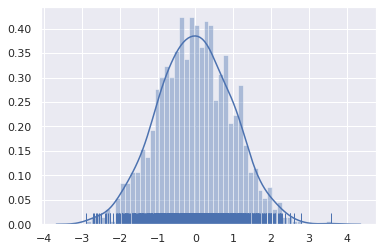

In [ ]:
# kde = False will remove pdf
# rug = Number of data points - can be used to check outlier is there or not
# bins = no of data between two reading

sns.distplot(x, kde = True,rug = True, bins = 50) ; 


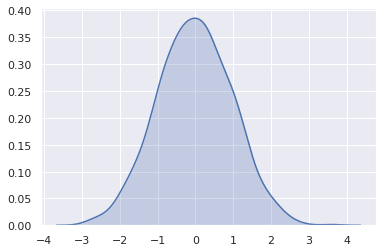

In [ ]:
sns.kdeplot(x,shade=True) ;

In [ ]:
y = np.random.randint(1,10,size = 10)
x = np.random.randint(1,10,size = 10)

Just for FUN

[2 1 2 7 3 7 7 3 8 9]


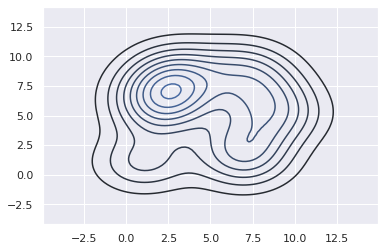

In [ ]:
print(x)
sns.kdeplot(x,y) ;


In [ ]:
diamond_data = sns.load_dataset('diamonds')

In [ ]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


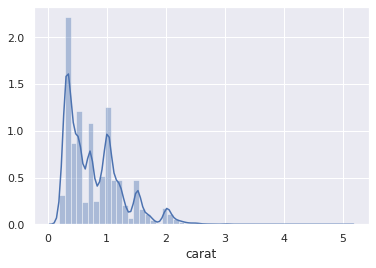

In [ ]:
sns.distplot(dimond_data['carat']) ;

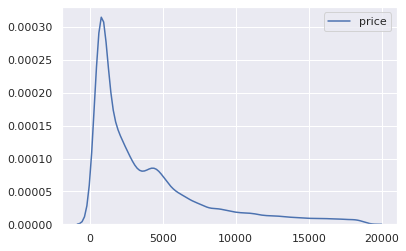

In [ ]:
sns.kdeplot(dimond_data.price) ; 

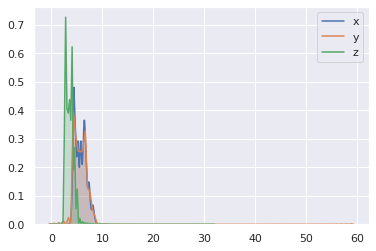

In [ ]:
sns.kdeplot(dimond_data.x, shade = True)
sns.kdeplot(dimond_data.y, shade = True)
sns.kdeplot(dimond_data.z, shade = True)



## Box Plot

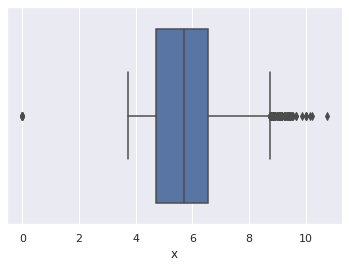

In [ ]:
sns.boxplot(diamond_data.x,whis = 1.2) ;

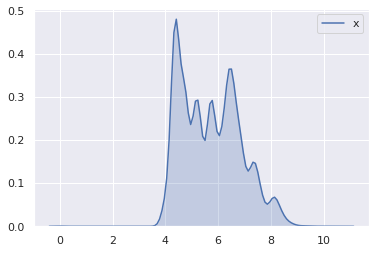

In [ ]:
sns.kdeplot(diamond_data.x,shade = True) ;

## Frequency Plot for categorical values : Bar Plot

In [ ]:
data = diamond_data.groupby(['cut'])['cut'].count()

In [ ]:
data

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

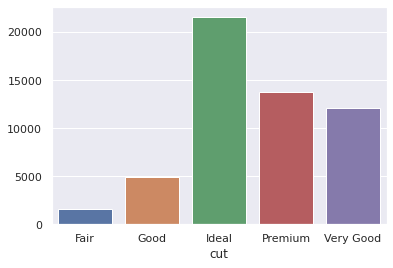

In [ ]:
sns.barplot(x = data.index, y = data.values) ; 

In [ ]:
data_color = diamond_data.groupby(['color'])['color'].count()

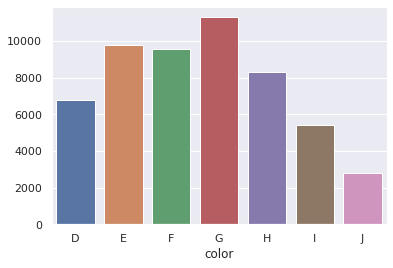

In [ ]:
sns.barplot(x = data_color.index, y = data_color.values) ; 

## Joint distribution of Two variable


In [ ]:
price = diamond_data.price
carat = diamond_data.carat
table = diamond_data.table

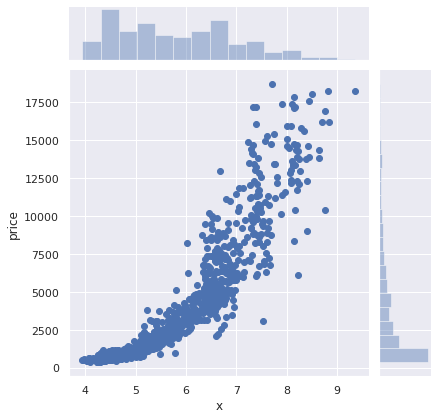

In [ ]:
sns.jointplot('x','price',data = diamond_data.sample(1000), kind = 'scatter') ; # kind can be "KDE"  too

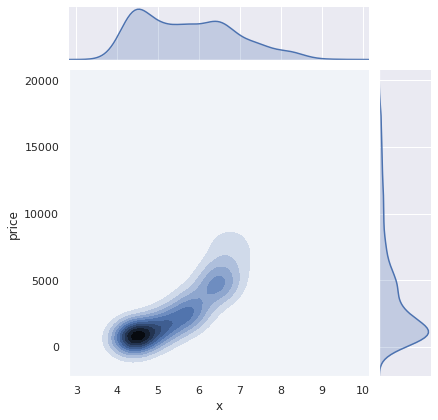

In [ ]:
sns.jointplot('x','price',data = diamond_data.sample(1000), kind = 'kde') ; # kind can be "KDE"  too

## Swarm PLot

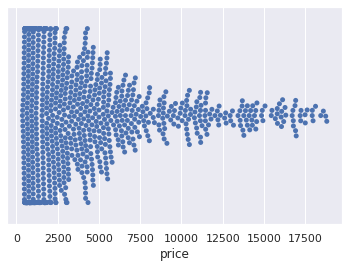

In [ ]:
sns.swarmplot(diamond_data.sample(1000).price) ; 

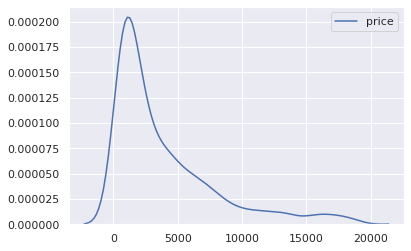

In [ ]:
sns.kdeplot(diamond_data.sample(1000).price) ; 

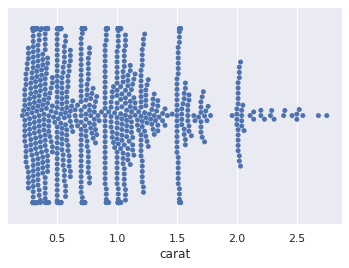

In [ ]:
sns.swarmplot(diamond_data.sample(1000).carat) ;

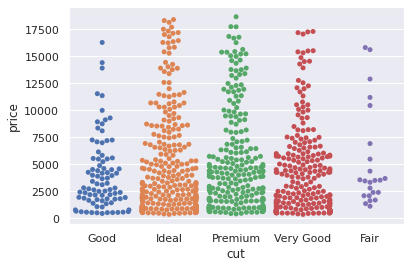

In [ ]:
sns.swarmplot(x = 'cut',y = 'price', data=diamond_data.sample(1000)) ;# One continuous value and one categorical value

## Violin Plot

All Plot in ONE:
Must check Hue in swarm plot



ValueError: ignored

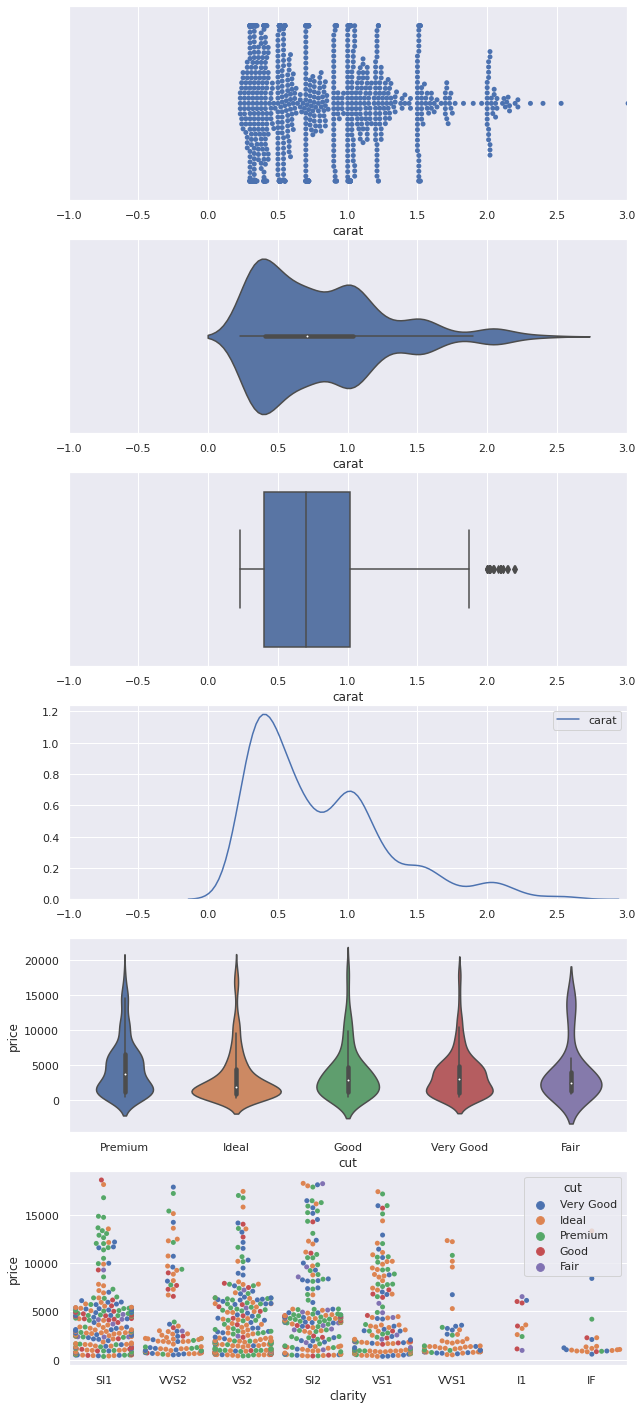

In [ ]:
fig, axs = plt.subplots(nrows=6)
fig.set_size_inches(10,25)

p1 = sns.swarmplot('carat', data = diamond_data.sample(1000), ax=axs[0])
p1.set(xlim = (-1,3))
p2 = sns.violinplot('carat', data = diamond_data.sample(1000), ax=axs[1])
p2.set(xlim = (-1,3))
p3 = sns.boxplot('carat',data = diamond_data.sample(1000), ax=axs[2])
p3.set(xlim = (-1,3))
p4 = sns.kdeplot(diamond_data.sample(1000).carat, ax=axs[3])
p4.set(xlim = (-1,3))

p5 = sns.violinplot('cut','price', data = dimond_data.sample(1000), ax=axs[4])
p5 = sns.swarmplot('clarity','price',hue = 'cut' ,data = dimond_data.sample(1000), ax=axs[5])



In [ ]:
pen_data = sns.load_dataset('penguins')

In [ ]:
pen_data.dropna(inplace=True)

## When we have two category we can use this

# Paired Violin Plot

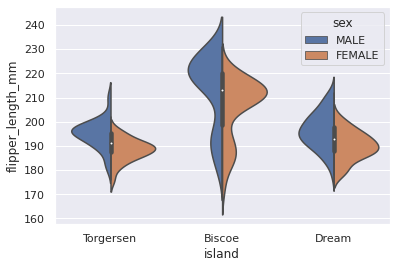

In [ ]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', hue = 'sex',split = True, data = pen_data) ; 

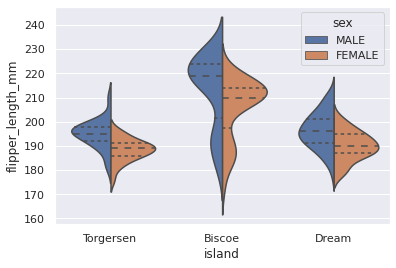

In [ ]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', hue = 'sex',split = True, inner = 'quartile' ,data = pen_data) ; 

# innner = quartile will give : upper quartile(75%) , median(50%) , lower quartile(25%)

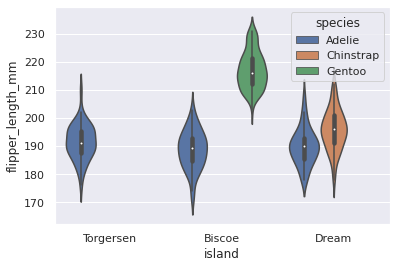

In [ ]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', hue = 'species',data = pen_data) ;
# Plotting multiple violin plot : split can be use for only two so we can plot using this

## How to represent multile parameter using SPLIT

In [ ]:
pen_data['binary_'] = pen_data.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

NameError: ignored

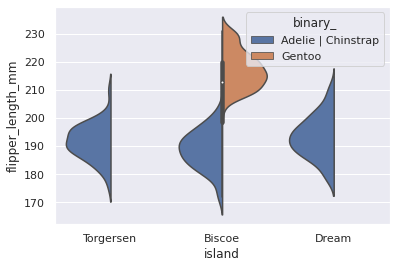

In [ ]:
sns.violinplot(x = 'island', y = 'flipper_length_mm', hue = 'binary_',split = 'True',data = pen_data) ;

## Faceted PLot

In [ ]:
pen_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


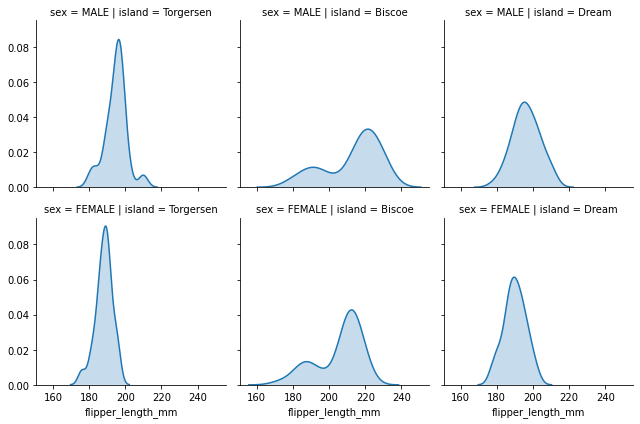

In [ ]:
multi_plot = sns.FacetGrid(pen_data,row = 'sex', col = 'island')
multi_plot.map(sns.kdeplot, 'flipper_length_mm',shade = True) ;

## Pair Plot

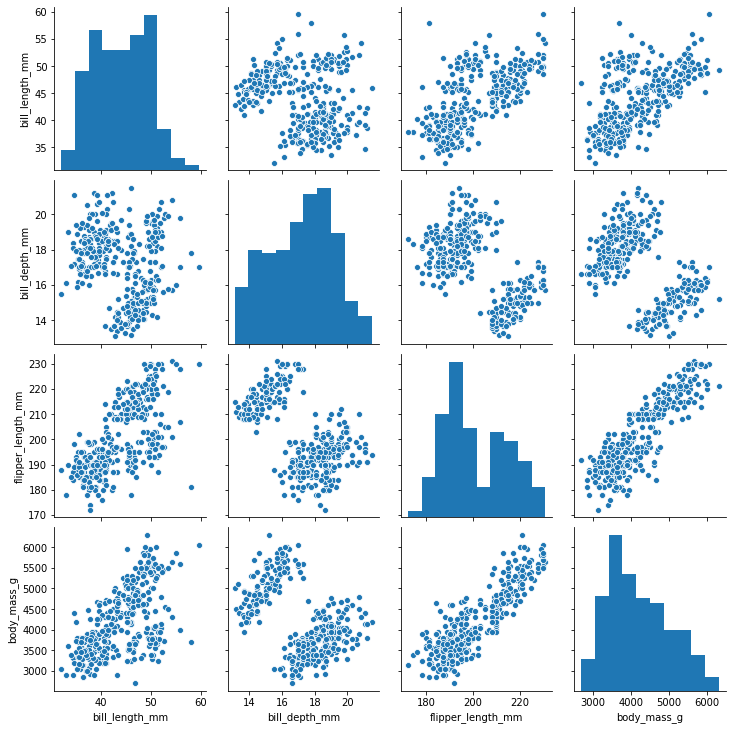

In [ ]:
sns.pairplot(pen_data) ; 

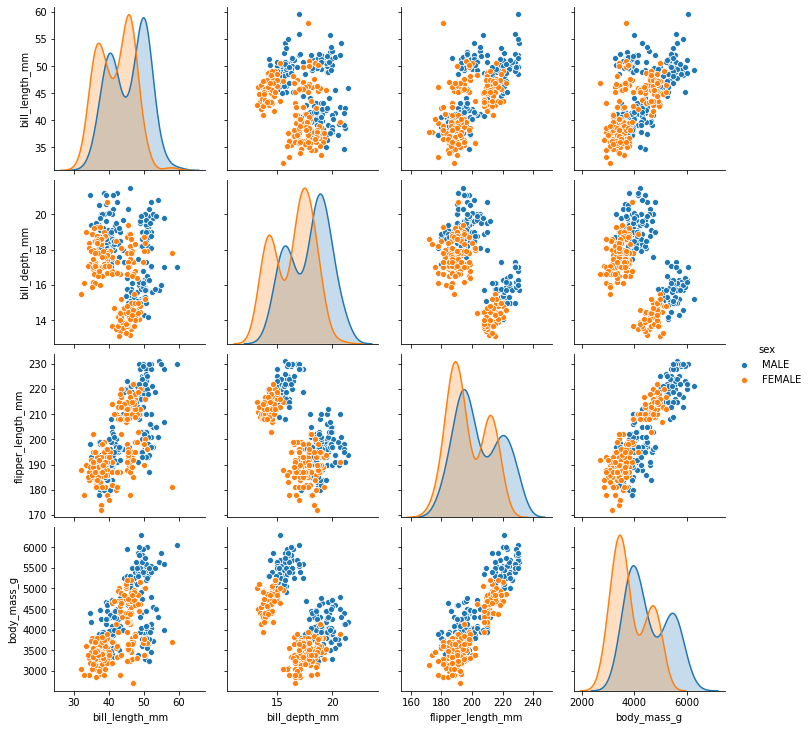

In [ ]:
sns.pairplot(pen_data, hue = 'sex') ; 

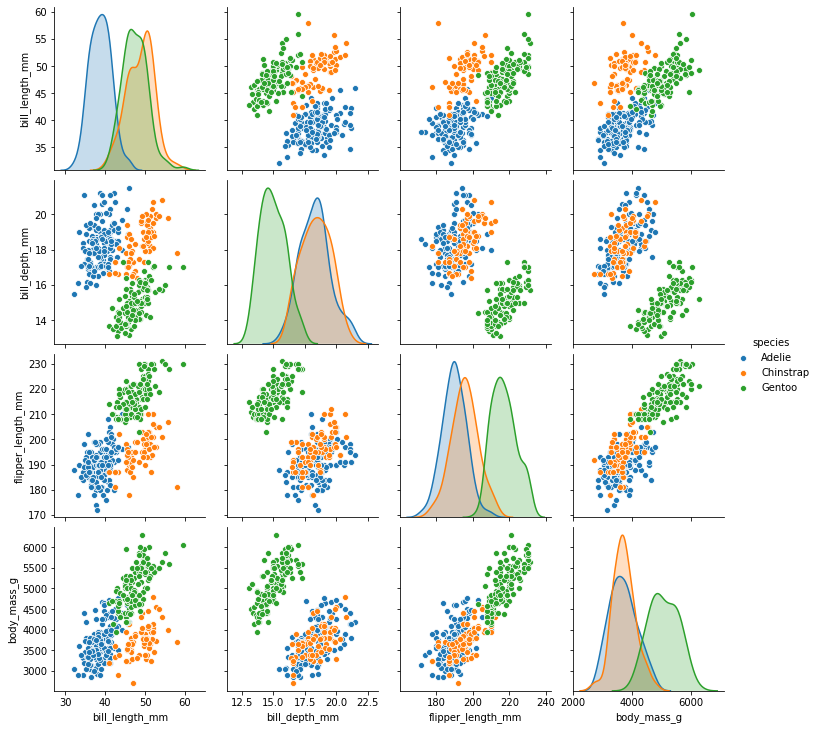

In [ ]:
sns.pairplot(pen_data, hue = 'species') ; 

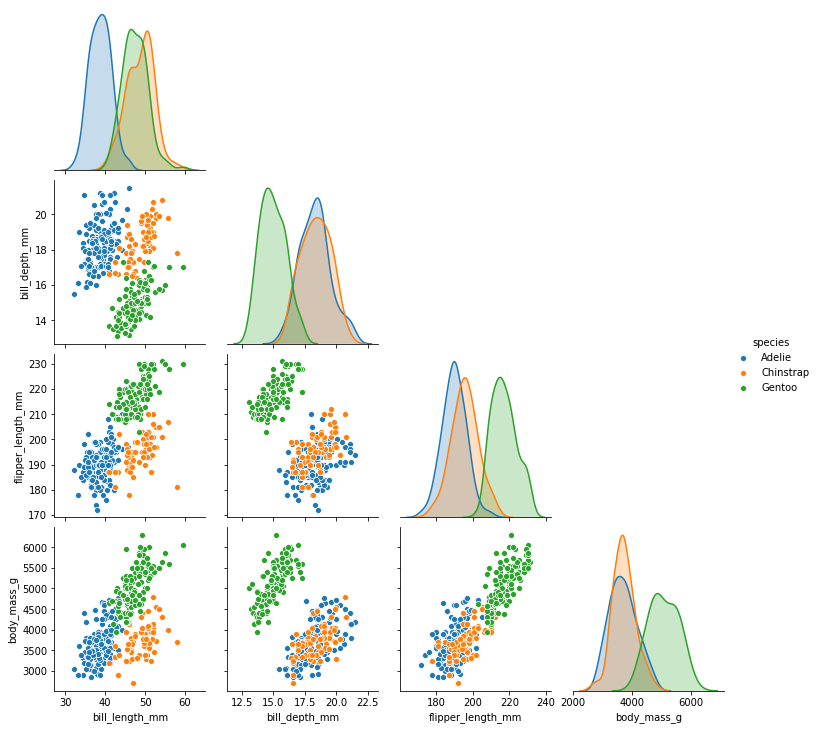

In [ ]:
sns.pairplot(pen_data, hue = 'species', corner= True) ; 

## Boxen Plot

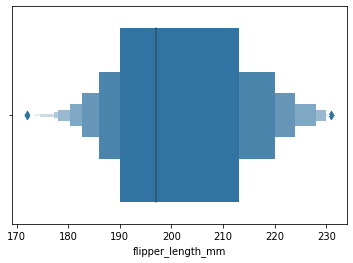

In [ ]:
sns.boxenplot('flipper_length_mm', data = pen_data) ;

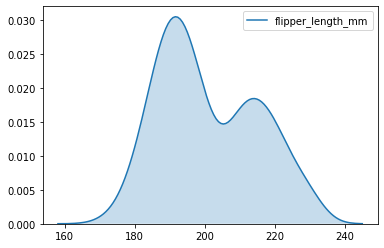

In [ ]:

sns.kdeplot(pen_data.flipper_length_mm, shade = True) ;

# Plotting Composition of Data

## Static composition : Static data (Data not varying with time)

## Pie Chart : Not recommended

In [ ]:
species_ = pen_data.groupby('species')['species'].count()

In [ ]:
species_

species
Adelie       146
Chinstrap     68
Gentoo       119
Name: species, dtype: int64

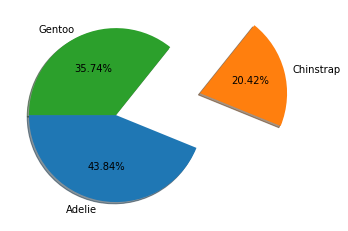

In [ ]:
plt.pie(species_, labels=species_.index, autopct= "%.2f%%", explode= [0,1,0], startangle = 180, shadow= True) ;

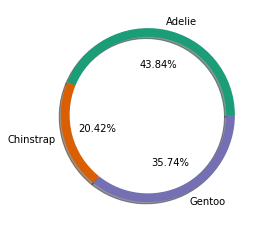

In [ ]:
plt.pie(species_, labels=species_.index, autopct= "%.2f%%", wedgeprops=dict(width = 0.1), shadow= True, colors= my_colors) ;

In [ ]:
cmap = plt.get_cmap('Dark2')
my_colors = cmap(np.arange(10))

## Stacked Bar Plot

In [ ]:
covid_data.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
covid_data.drop('date', axis= 1, inplace=True)

In [ ]:
covid_data.set_index('status', inplace=True)

In [ ]:
df_ = covid_data.tail(3)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt',inplace = True)

In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased
an,40,47,0
ap,10794,11915,70
ar,71,91,0
as,1537,1763,8
br,1797,1924,4


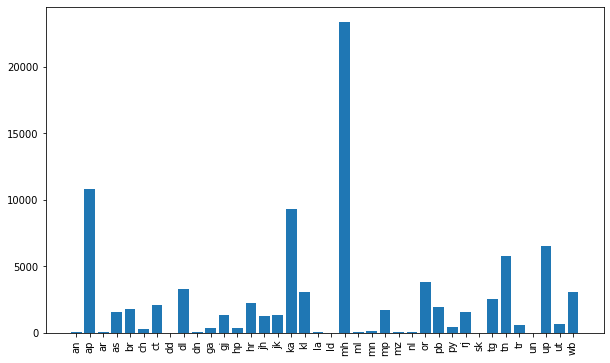

In [ ]:
figure(num = None, figsize=(10,6))
plt.bar(df_.index, df_.Confirmed) ;
plt.xticks(rotation = 90) ; 


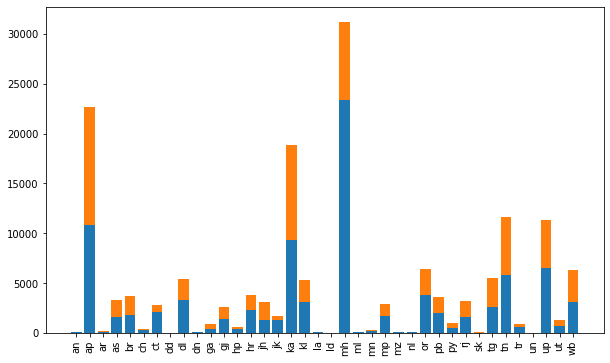

In [ ]:
figure(num = None, figsize=(10,6))
plt.bar(df_.index, df_.Confirmed) ;
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed)
plt.xticks(rotation = 90) ; 

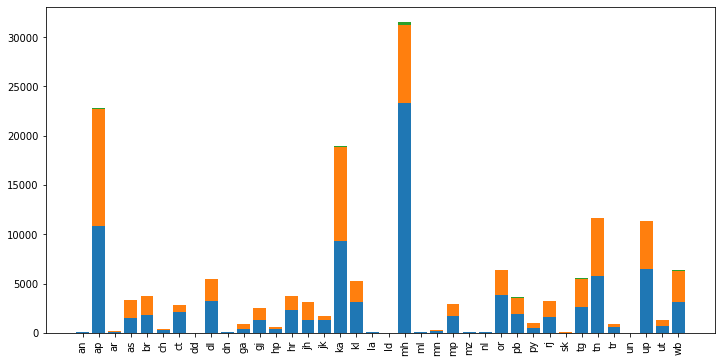

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.bar(df_.index, df_.Confirmed) ;
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed)
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed+df_.Recovered)
plt.xticks(rotation = 90) ; 

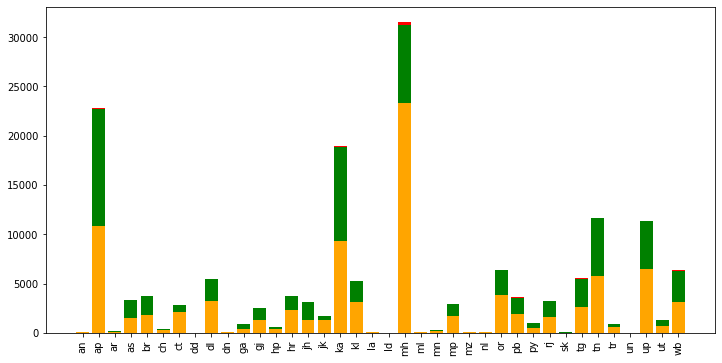

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.bar(df_.index, df_.Confirmed, color = 'Orange') ;
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed+df_.Recovered, color = 'Red')
plt.xticks(rotation = 90) ; 

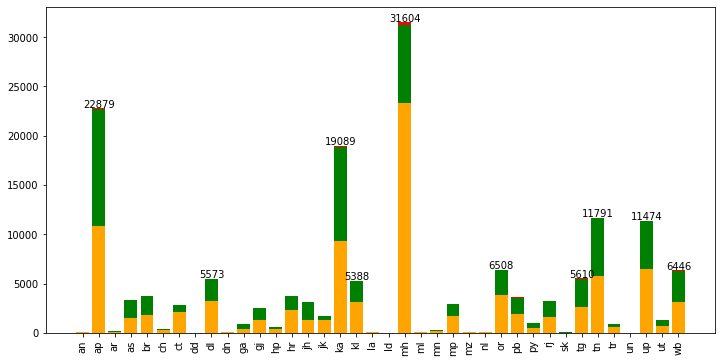

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.bar(df_.index, df_.Confirmed, color = 'Orange') ;
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed+df_.Recovered, color = 'Red')
plt.xticks(rotation = 90) ; 

for i,val in enumerate(df_.index):
  y = df_.loc[val].sum() + 100
  if y > 5000:
    x = i
    plt.text(i,y,s = str(y),ha = 'center')

### Relative stacked Bar plot

In [ ]:
df_.head()

status,Confirmed,Recovered,Deceased
an,40,47,0
ap,10794,11915,70
ar,71,91,0
as,1537,1763,8
br,1797,1924,4


In [ ]:
df_['Total'] = df_.sum(axis = 1)

In [ ]:
df_['ConfirmedFraction'] = df_.Confirmed/df_.Total
df_['RecoveredFraction'] = df_.Recovered/df_.Total
df_['DecesedFraction'] = df_.Deceased/df_.Total

In [ ]:
df_.drop(['con/tot','rec/tot','dec/tot'], inplace = True, axis = 1)

In [ ]:
df_.dropna(inplace = True)

In [ ]:
df_

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DecesedFraction
an,40,47,0,87,0.459770,0.540230,0.000000
ap,10794,11915,70,22779,0.473858,0.523069,0.003073
ar,71,91,0,162,0.438272,0.561728,0.000000
as,1537,1763,8,3308,0.464631,0.532950,0.002418
br,1797,1924,4,3725,0.482416,0.516510,0.001074
ch,261,149,2,412,0.633495,0.361650,0.004854
ct,2100,711,24,2835,0.740741,0.250794,0.008466
dl,3256,2188,29,5473,0.594921,0.399781,0.005299
dn,36,21,0,57,0.631579,0.368421,0.000000
ga,374,558,7,939,0.398296,0.594249,0.007455


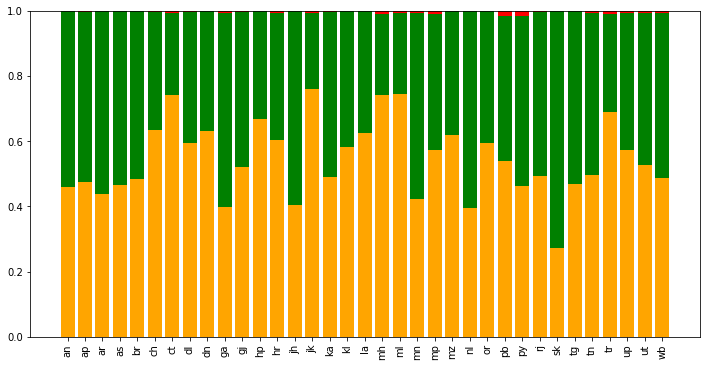

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.bar(df_.index, df_.ConfirmedFraction, color = 'Orange') ;
plt.bar(df_.index, df_.RecoveredFraction, bottom= df_.ConfirmedFraction, color = 'Green')
plt.bar(df_.index, df_.DecesedFraction, bottom= df_.ConfirmedFraction+df_.RecoveredFraction, color = 'Red')
plt.xticks(rotation = 90) ; 

In [ ]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

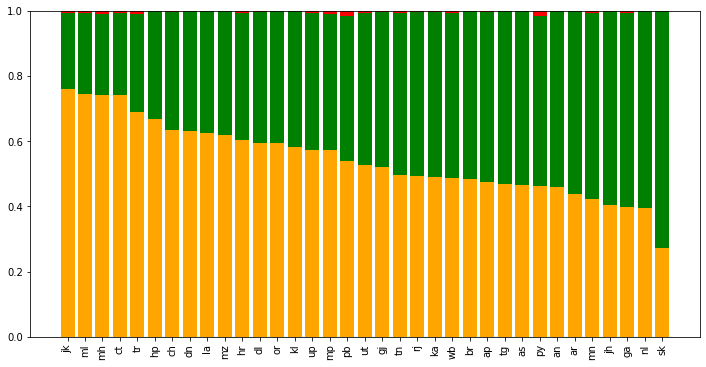

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.bar(df_.index, df_.ConfirmedFraction, color = 'Orange') ;
plt.bar(df_.index, df_.RecoveredFraction, bottom= df_.ConfirmedFraction, color = 'Green')
plt.bar(df_.index, df_.DecesedFraction, bottom= df_.ConfirmedFraction+df_.RecoveredFraction, color = 'Red')
plt.xticks(rotation = 90) ; 

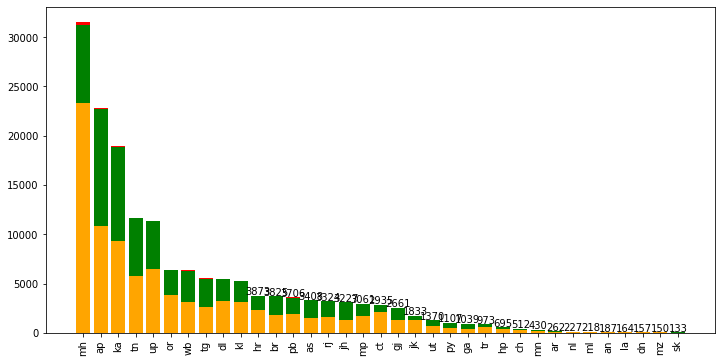

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,6)
df_.sort_values('Total',ascending=False, inplace= True)
plt.bar(df_.index, df_.Confirmed, color = 'Orange') ;
plt.bar(df_.index, df_.Recovered, bottom= df_.Confirmed, color = 'Green')
plt.bar(df_.index, df_.Deceased, bottom= df_.Confirmed+df_.Recovered, color = 'Red')
plt.xticks(rotation = 90) ; 

for i,val in enumerate(df_.index):
  y = df_.loc[val, 'Total'] + 100
  if y < 5000:
    x = i
    plt.text(i,y,s = str(y),ha = 'center')

## Time Varying Composition of DATA


## Stacked Area plot

In [ ]:
covid_data.tail(5)

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
526,41,11941,101,2343,1965,185,879,05-Sep-20,0,1920,28,534,1148,21,1409,2287,489,9102,2111,42,0,10801,59,76,1392,32,68,3443,1306,433,1346,26,Recovered,2579,5859,271,73161,0,5141,535,3248
527,1,71,0,7,9,1,19,05-Sep-20,0,25,0,9,16,4,22,15,15,0,11,0,0,312,1,1,30,0,0,7,69,18,14,0,Deceased,11,64,7,916,0,81,18,58
528,40,10794,71,1537,1797,261,2100,06-Sep-20,0,3256,36,374,1335,397,2277,1266,1316,9319,3082,40,0,23350,88,139,1694,31,50,3810,1946,466,1593,9,Confirmed,2574,5783,603,91707,0,6518,668,3087
529,47,11915,91,1763,1924,149,711,06-Sep-20,0,2188,21,558,1212,197,1471,1854,403,9575,2196,24,0,7826,29,189,1238,19,77,2590,1606,525,1616,24,Recovered,2927,5820,262,69624,0,4779,591,3207
530,0,70,0,8,4,2,24,06-Sep-20,0,29,0,7,14,1,25,7,14,95,10,0,0,328,1,2,29,0,0,8,54,16,15,0,Deceased,9,88,8,1008,0,77,11,52


In [ ]:
df_ = covid_data[['mh','date','status']]

In [ ]:
df_.head()

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [ ]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_ = df_.pivot_table(values='mh',index = 'date', columns='status')

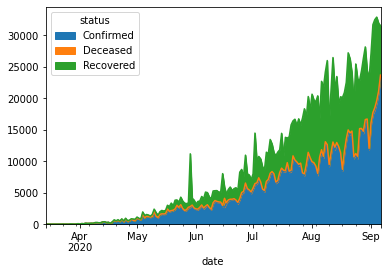

In [ ]:
df_.plot.area() ;  

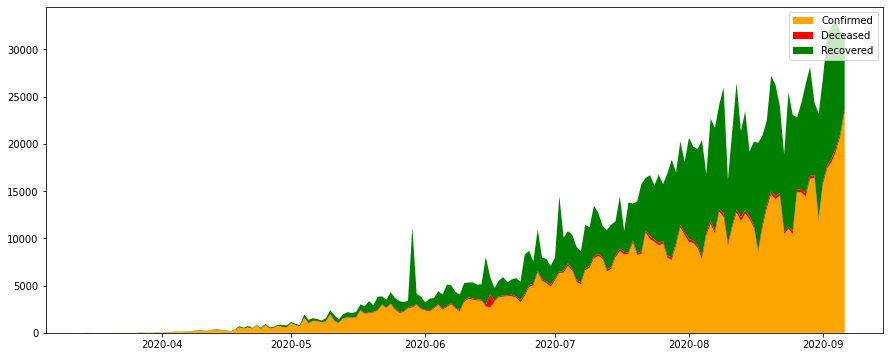

In [ ]:
fig = plt.gcf() ;
fig.set_size_inches(15,6) ; 
plt.stackplot(df_.index,df_.Confirmed,df_.Deceased,df_.Recovered,labels=['Confirmed','Deceased','Recovered'],
              colors=['Orange','Red','Green']) ;
plt.legend() ; 

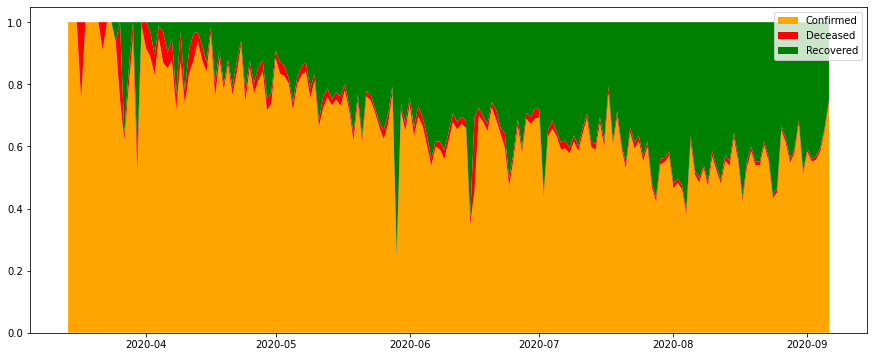

In [ ]:
fig = plt.gcf() ;
fig.set_size_inches(15,6) ; 
plt.stackplot(df_.index,df_.Confirmed/df_.sum(axis = 1),df_.Deceased/df_.sum(axis = 1),df_.Recovered/df_.sum(axis = 1),labels=['Confirmed','Deceased','Recovered'],
              colors=['Orange','Red','Green']) ;
plt.legend() ; 

In [ ]:
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [ ]:
def plot_stacked_areaplot_by_state(state):
  df_ = covid_data[[state,'date','status']] ; 
  df_[state] = pd.to_numeric(df_[state]) ; 
  df_['date'] = pd.to_datetime(df_.date) ; 
  df_ = df_.pivot_table(values = state, index = 'date', columns = 'status') ;
  figure(1)
  fig = plt.gcf() ;
  fig.set_size_inches(15,6) ; 
  plt.stackplot(df_.index,df_.Confirmed/df_.sum(axis = 1),df_.Deceased/df_.sum(axis = 1),df_.Recovered/df_.sum(axis = 1),labels=['Confirmed','Deceased','Recovered'],
                colors=['Orange','Red','Green']) ;
  plt.legend() ; 
  figure(2)
  fig = plt.gcf() ;
  fig.set_size_inches(15,6) ; 
  plt.stackplot(df_.index,df_.Confirmed,df_.Deceased,df_.Recovered,labels=['Confirmed','Deceased','Recovered'],
                colors=['Orange','Red','Green']) ;
  plt.legend() ; 
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


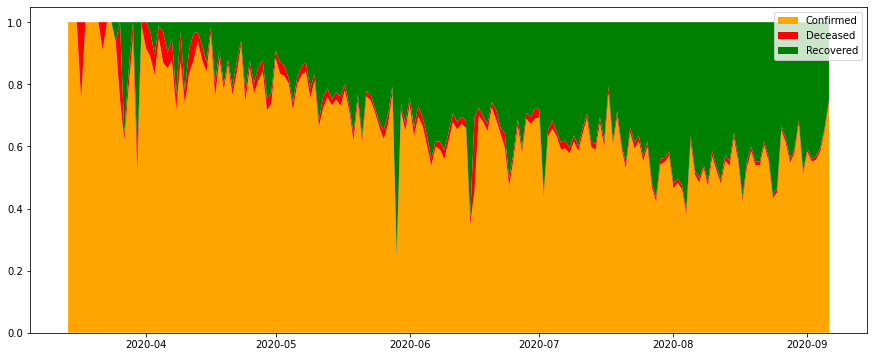

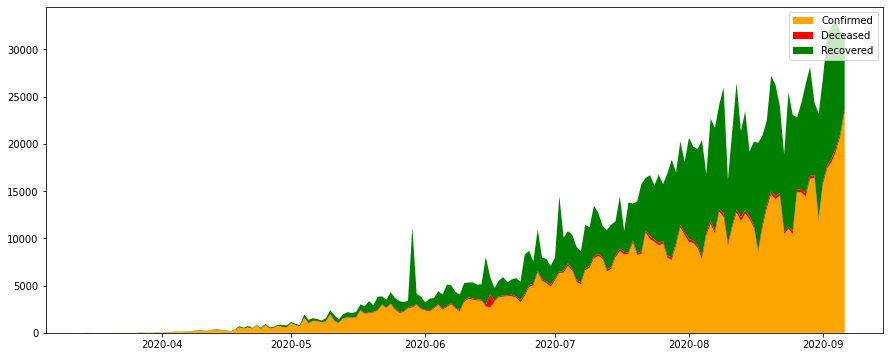

In [ ]:

plot_stacked_areaplot_by_state('mh') ;


# Plotting Relationship between Data

## Scatter Plot

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


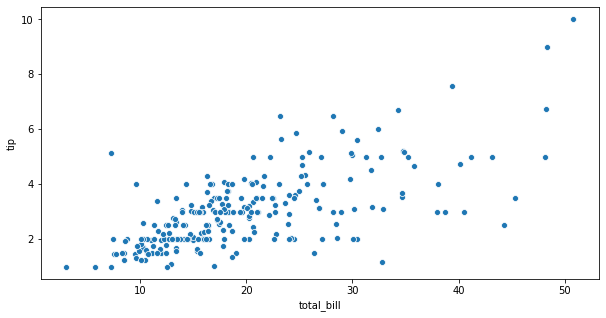

In [ ]:
figure(1, figsize=(10,5))
sns.scatterplot(tips.total_bill, tips.tip) ; 

In [ ]:
tips['TipFraction'] = tips.tip/tips.total_bill

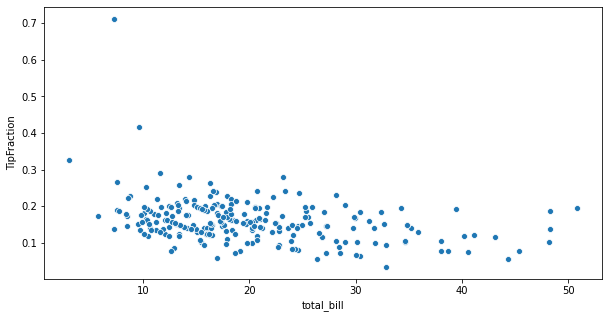

In [ ]:
figure(1, figsize=(10,5))
sns.scatterplot(tips.total_bill, tips.TipFraction) ; 

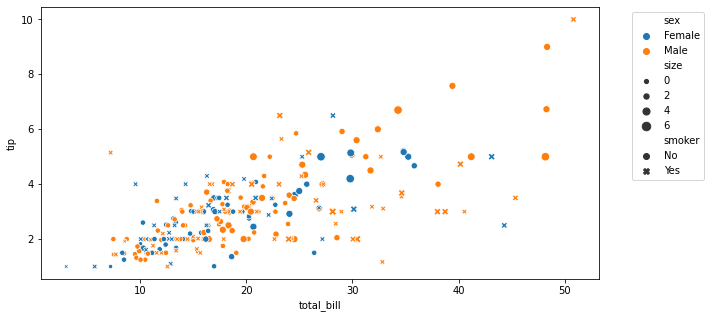

In [ ]:
figure(1, figsize=(10,5))
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', style = 'smoker', size = 'size') ; 
plt.legend(bbox_to_anchor = (1.05,1)) ; 

No handles with labels found to put in legend.


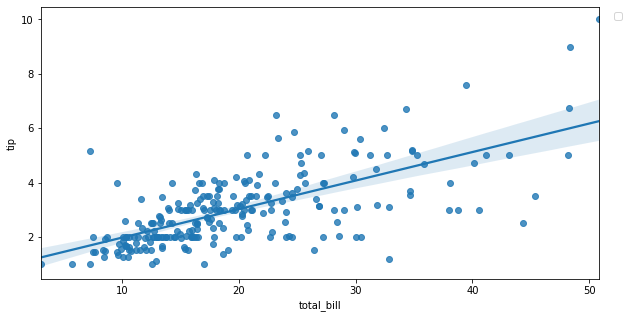

In [ ]:
figure(1, figsize=(10,5))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, order = 1) ; 
plt.legend(bbox_to_anchor = (1.05,1)) ; 

## Bar PLot